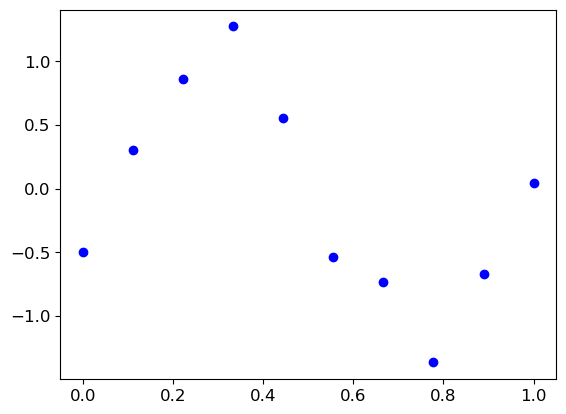

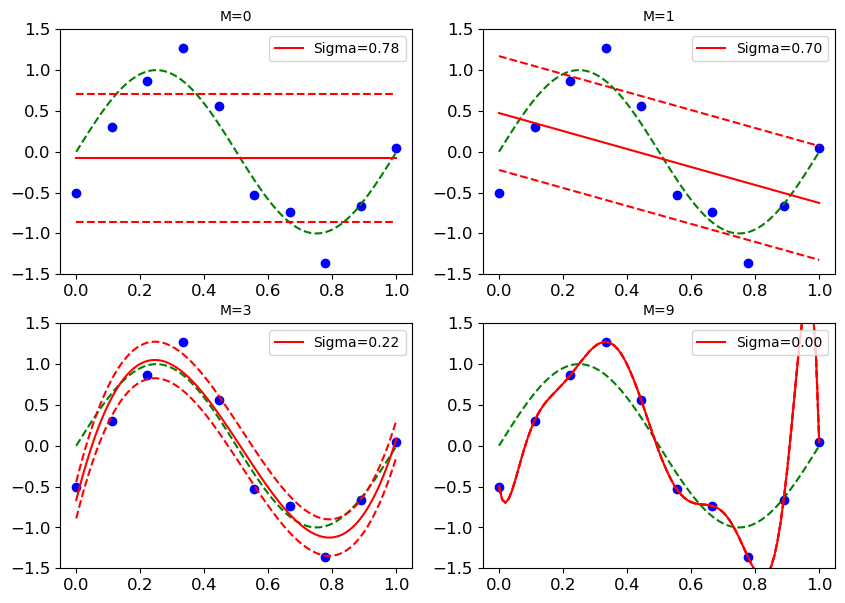

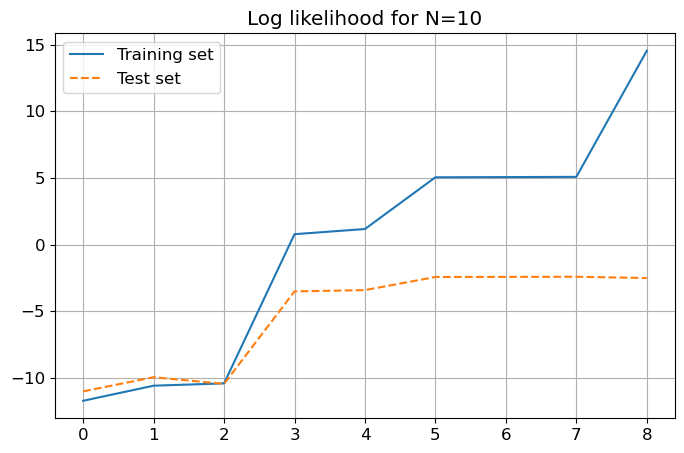

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal

import matplotlib
matplotlib.rcParams['font.size'] = 12

import warnings
warnings.filterwarnings('ignore')

# データセット {x_n,y_n} (n=1...num)を用意
def create_dataset(num):
    dataset = DataFrame(columns=['x','y'])
    for i in range(num):
        x = float(i)/float(num-1)
        y = np.sin(2*np.pi*x) + normal(scale=0.3)
        dataset = dataset.append(Series([x, y], index=['x', 'y']),ignore_index=True)
    return dataset
N=10
train_set = create_dataset(N)
plt.scatter(train_set.x, train_set.y, marker='o', color='blue')

def resolve(dataset, m):
    t = dataset.y
    phi = DataFrame()
    for i in range(0, m+1):
        p = dataset.x**i
        p.name="x**%d" % i
        phi = pd.concat([phi, p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)

    def f(x):
        y = 0.0
        for i,w in enumerate(ws):
            y += w * (x ** i)
        return y
    
    sigma2 = 0.0
    for index, line in dataset.iterrows():
        sigma2 += (f(line.x)-line.y)**2
    sigma2 /= len(dataset)
    
    return (f, np.sqrt(sigma2))

# 最大対数尤度 (Maximum log likelihood) を計算
def log_likelihood(dataset, f):
    dev = 0.0
    n = float(len(dataset))
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        dev += (y - f(x))**2
    err = dev * 0.5
    beta = n / dev
    lp = -beta*err + 0.5*n*np.log(0.5*beta/np.pi)
    return lp

def show_result(subplot, train_set, m):
    f, sigma = resolve(train_set, m)
    subplot.set_xlim(-0.05, 1.05)
    subplot.set_ylim(-1.5, 1.5)
    subplot.set_title("M=%d" % m, fontsize=10)

    # トレーニングセットを表示
    subplot.scatter(train_set.x, train_set.y, marker='o',
                    color='blue', label=None)

    # 真の曲線を表示
    linex = np.linspace(0, 1, 101)
    liney = np.sin(2*np.pi*linex)
    subplot.plot(linex, liney, color='green', linestyle='--')

    # 多項式近似の曲線を表示
    linex = np.linspace(0, 1, 101)
    liney = f(linex)
    label = "Sigma=%.2f" % sigma
    subplot.plot(linex, liney, color='red', label=label)
    subplot.plot(linex, liney+sigma, color='red', linestyle='--')
    subplot.plot(linex, liney-sigma, color='red', linestyle='--')
    subplot.legend(loc=1, fontsize=10)
     
fig = plt.figure(figsize=(10, 7))
for i, m in enumerate([0, 1, 3, 9]):
    subplot = fig.add_subplot(2, 2, i+1)
    show_result(subplot, train_set, m)


# 多項式近似に対する最大対数尤度を計算
def show_loglikelihood_trend(train_set, test_set):
    df = DataFrame()
    train_mlh = []
    test_mlh = []
    for m in range(0, 9): # 多項式の次数
        f, sigma = resolve(train_set, m)
        train_mlh.append(log_likelihood(train_set, f))
        test_mlh.append(log_likelihood(test_set, f))
    df = pd.concat([df,
                    DataFrame(train_mlh, columns=['Training set']),
                    DataFrame(test_mlh, columns=['Test set'])],
                    axis=1)
    df.plot(title='Log likelihood for N=%d' % N, grid=True, style=['-','--'],
             xticks=range(0, 9), figsize=(8, 5))
     
test_set = create_dataset(N)
show_loglikelihood_trend(train_set, test_set)
# 多項式の次数が3を超えたあたりから対数尤度に変化が見られない (オーバーフィッテングの検出)

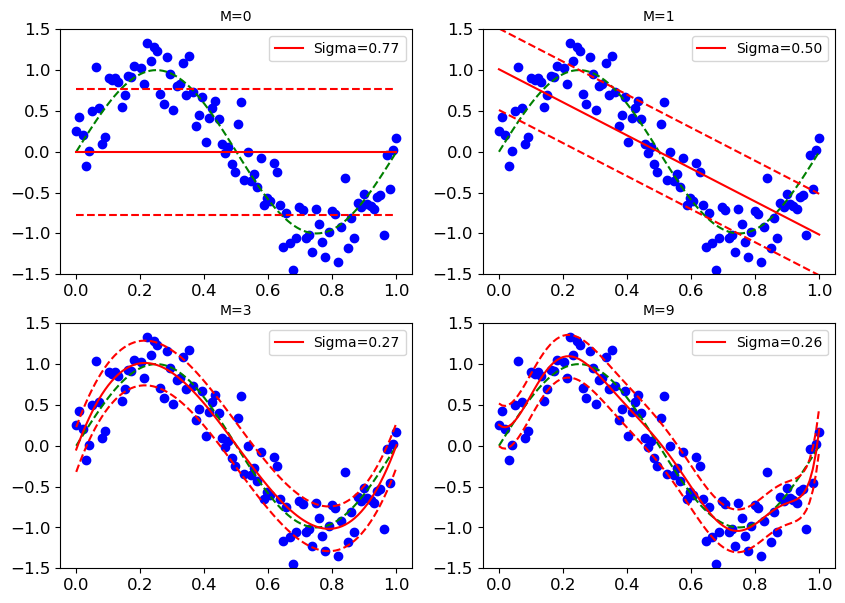

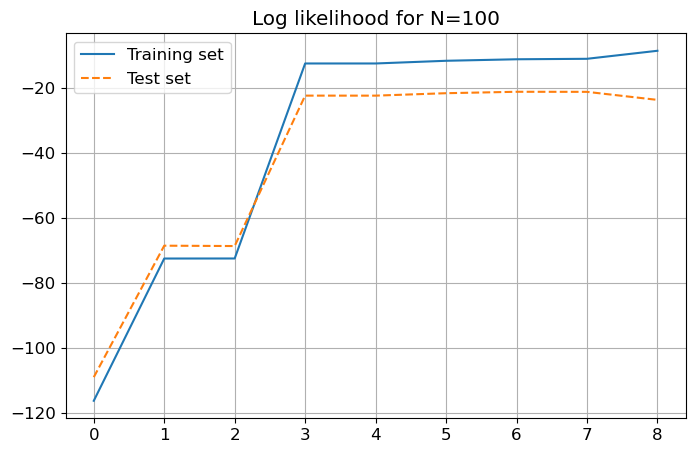

In [6]:
# データ数を増やした場合 対数尤度は次数3以降変化は見られないので次数3で近似可能
N=100
train_set = create_dataset(N)
test_set = create_dataset(N)
fig = plt.figure(figsize=(10, 7))
for i, m in enumerate([0, 1, 3, 9]):
    subplot = fig.add_subplot(2, 2, i+1)
    show_result(subplot, train_set, m)
show_loglikelihood_trend(train_set, test_set)